# Importing Libraries

In [3]:
import pandas as pd
import numpy as np

import missingno as msno

from sklearn.impute import SimpleImputer as SI

import matplotlib.pyplot as plt
import seaborn as sb

from scipy.stats import skew

#Read data and summary statistics

Using `.describe`, `.info`, `.head`, `.tail` to have a glimpse of the dataset

In [4]:
data = pd.read_csv('house_prices.csv')

In [5]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


#Missing Values

##Show which features has missing values

In [9]:
mask = data.isnull()
total = mask.sum()

missing_data = pd.concat([total], axis=1,join='outer',
                         keys=['count_missing'])
missing_data.sort_values(by='count_missing', ascending=False, inplace=True)
missing_datamask = data.isnull()
missing_data

,count_missing
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
...,...
ExterQual,0
Exterior2nd,0
Exterior1st,0
RoofMatl,0


##Displaying visually the missing values of the uncleaned data

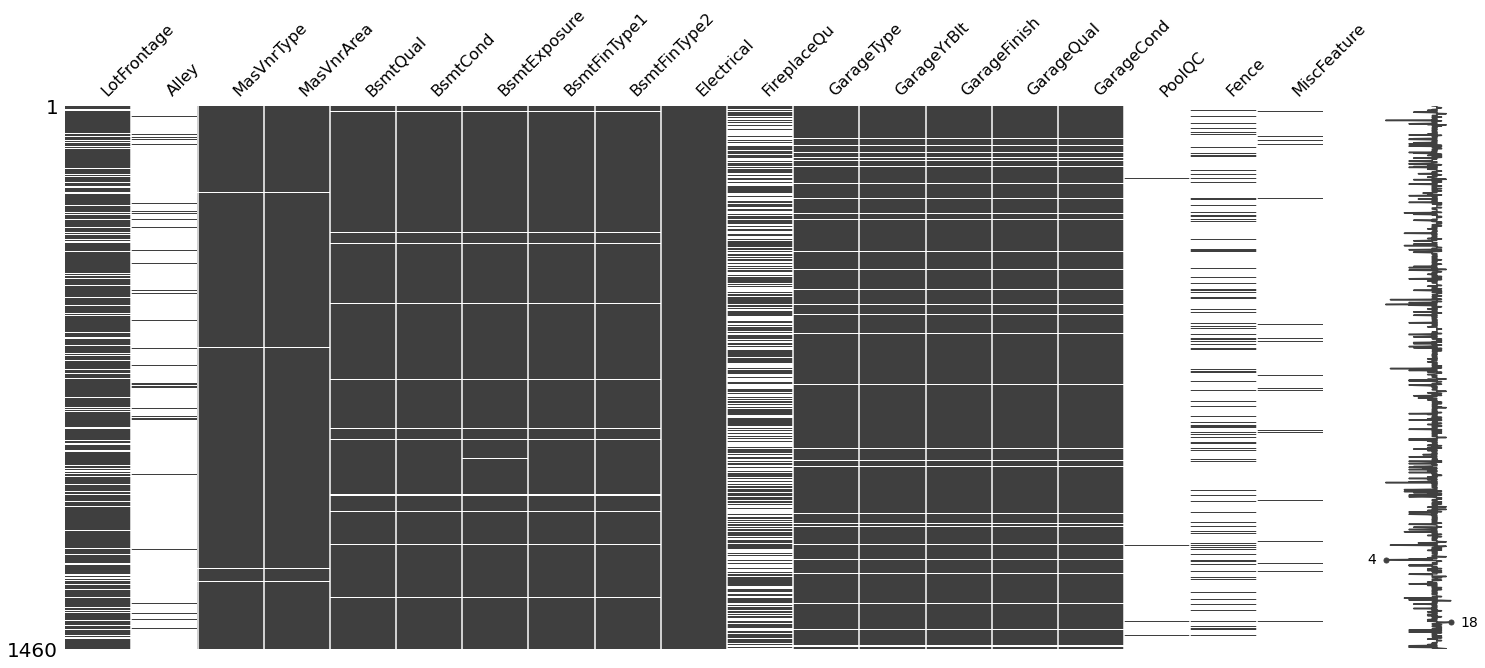

In [10]:
nullable_columns = data.columns[mask.any()].tolist()
msno.matrix(data[nullable_columns])
plt.show()

#1.1 and 1.2 Filling Missing Values

##Cleaning features with text as values

In [11]:
object_features = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageCond", "GarageType", "GarageQual", "GarageFinish", "BsmtExposure", "BsmtQual", "BsmtCond", "BsmtFinType2", "BsmtFinType1", "MasVnrType", "Electrical"]
imp = SI(missing_values=np.nan, strategy='constant', fill_value='NA')
data[object_features] = imp.fit_transform(data[object_features])
data[object_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PoolQC        1460 non-null   object
 1   MiscFeature   1460 non-null   object
 2   Alley         1460 non-null   object
 3   Fence         1460 non-null   object
 4   FireplaceQu   1460 non-null   object
 5   GarageCond    1460 non-null   object
 6   GarageType    1460 non-null   object
 7   GarageQual    1460 non-null   object
 8   GarageFinish  1460 non-null   object
 9   BsmtExposure  1460 non-null   object
 10  BsmtQual      1460 non-null   object
 11  BsmtCond      1460 non-null   object
 12  BsmtFinType2  1460 non-null   object
 13  BsmtFinType1  1460 non-null   object
 14  MasVnrType    1460 non-null   object
 15  Electrical    1460 non-null   object
dtypes: object(16)
memory usage: 182.6+ KB


##Cleaning features with numerical values

####**Thoughts**: `strategy='constant', fill_value = 0` is used kasi baka di siya nag-eexist dun sa bahay kaya ginawang 0

In [12]:
float_to_zero_features = ["LotFrontage", "MasVnrArea"]
imp = SI(missing_values=np.nan, strategy='constant', fill_value = 0)
data[float_to_zero_features] = imp.fit_transform(data[float_to_zero_features])
data[float_to_zero_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1460 non-null   float64
 1   MasVnrArea   1460 non-null   float64
dtypes: float64(2)
memory usage: 22.9 KB


##Displaying visually the missing values of the cleand data

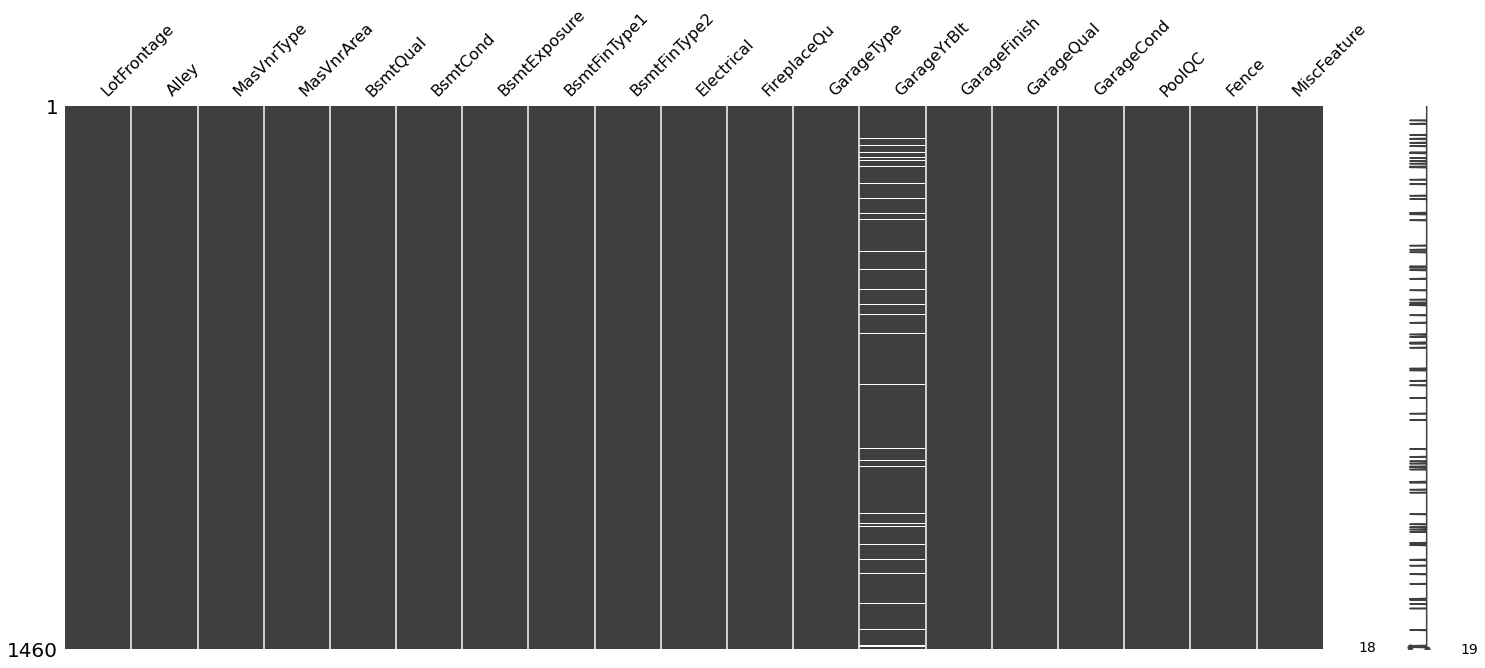

In [13]:
nullable_columns = data.columns[mask.any()].tolist()
msno.matrix(data[nullable_columns])
plt.show()

**GarageYrBlt** is untouched because I don't know how to clean missing years.

#Saving cleaned dataset

In [14]:
data.to_csv('cleaned_house_prices.csv')

#1.3 Data skewness and Kurtosis

In [15]:
data.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Id                0.000000
MSSubClass        1.407657
LotFrontage       0.267822
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.677616
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
S

In [16]:
data.skew().sort_values()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


GarageYrBlt      -0.649415
YearBuilt        -0.613461
YearRemodAdd     -0.503562
GarageCars       -0.342549
Id                0.000000
FullBath          0.036562
YrSold            0.096269
GarageArea        0.179981
BedroomAbvGr      0.211790
MoSold            0.212053
OverallQual       0.216944
LotFrontage       0.267822
BsmtFullBath      0.596067
Fireplaces        0.649565
HalfBath          0.675897
TotRmsAbvGrd      0.676341
OverallCond       0.693067
2ndFlrSF          0.813030
BsmtUnfSF         0.920268
GrLivArea         1.366560
1stFlrSF          1.376757
MSSubClass        1.407657
TotalBsmtSF       1.524255
WoodDeckSF        1.541376
BsmtFinSF1        1.685503
SalePrice         1.882876
OpenPorchSF       2.364342
MasVnrArea        2.677616
EnclosedPorch     3.089872
BsmtHalfBath      4.103403
ScreenPorch       4.122214
BsmtFinSF2        4.255261
KitchenAbvGr      4.488397
LowQualFinSF      9.011341
3SsnPorch        10.304342
LotArea          12.207688
PoolArea         14.828374
M

##Skewness of SalePrice

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


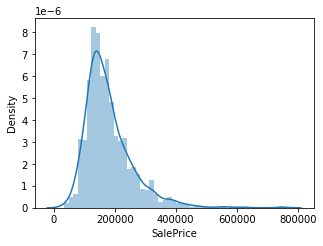

In [17]:
plt.figure(figsize=(5, 3.5))
sb.distplot(data["SalePrice"])
plt.show()

##Skewness of features na nilinis na may numerical value

LotFrontage
0.26754714932471685


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


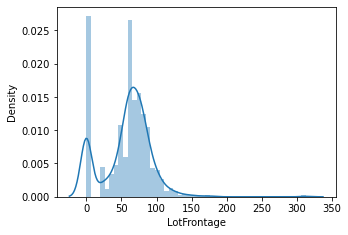

MasVnrArea
2.6748646898037354


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


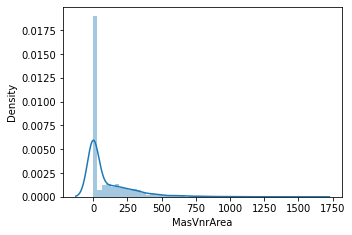

In [18]:
for k in data[float_to_zero_features]:
  print(k)
  print(skew(data[float_to_zero_features][k]))

  plt.figure(figsize=(5, 3.5))
  sb.distplot(data[float_to_zero_features][k])
  plt.show()

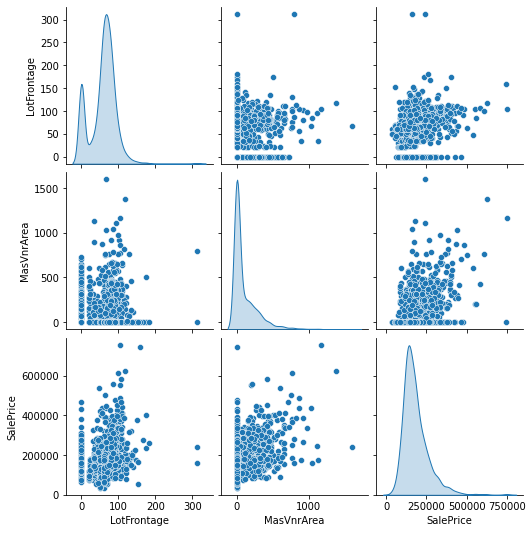

In [19]:
to_pair_plot = ["LotFrontage", "MasVnrArea", "SalePrice"]

sb.pairplot(data[to_pair_plot].dropna(), kind ='scatter', diag_kind='kde')
plt.show()

#1.4 Balancing the Distribution of Values

##Visualizing all categories of the feature(SaleCondition)

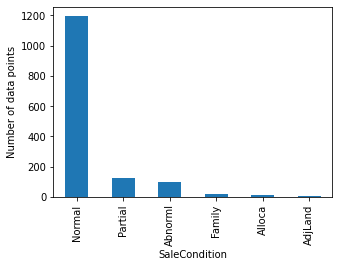

In [20]:
plt.figure(figsize=(5, 3.5))

data.SaleCondition.value_counts().plot(kind='bar')

plt.ylabel('Number of data points')
plt.xlabel('SaleCondition')
plt.show()

##Counting each category of the feature(SaleCondition)

In [21]:
count_category = data.SaleCondition.value_counts(dropna=False,)
count_category

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

##Removing `Family`, `Alloca`, and `AdjLand` kasi di required

In [22]:
data['SaleCondition'].replace(to_replace=['Family','Alloca','AdjLand'], value=np.NAN, inplace=True)

##Recounting each category

In [23]:
new_count_category = data.SaleCondition.value_counts(dropna=False,)
new_count_category

Normal     1198
Partial     125
Abnorml     101
NaN          36
Name: SaleCondition, dtype: int64

##Balancing all categories

**101** is chosen since `Abnorml` category has 101

In [24]:
def sampling_k_elements(SaleCondition, k=101):
    if len(SaleCondition) < k:
        return SaleCondition
    return SaleCondition.sample(k)

balanced = data.groupby('SaleCondition').apply(sampling_k_elements).reset_index(drop=True)

##Recounting the balanced categories

In [25]:
count_balanced = balanced.SaleCondition.value_counts(dropna=False,)
count_balanced

Abnorml    101
Normal     101
Partial    101
Name: SaleCondition, dtype: int64

##Visualizing the balanced categories

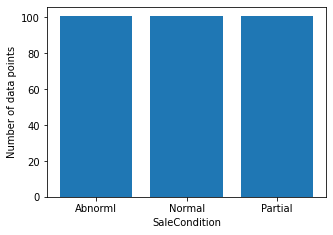

In [26]:
plt.figure(figsize=(5, 3.5))

plt.bar(count_balanced.index, count_balanced)

plt.ylabel('Number of data points')
plt.xlabel('SaleCondition')
plt.show()

In [27]:
data.to_csv('balanced_house_prices.csv')